Import Important libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the data

In [3]:
df = pd.read_csv("car.csv")
df.head(15)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,BMW,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000
1,Honda,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,Toyota,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000
3,Ford,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000
4,Honda,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000
5,BMW,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,440000
6,Nissan,2007,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.50,5.0,96000
7,Ford,2001,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,4.0,45000
8,Ford,2011,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,5.0,350000
9,Honda,2013,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,5.0,200000


Split data to Features(x) and label(y)

In [4]:
x = df.iloc[:, :-1].values # Features: Extracting all rows for all columns except the last one (label) 
y = df.iloc[:, -1].values # Label: Extracting all rows for the last column (label)
pd.DataFrame(x).isnull().sum() # Display columns with missing data 

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7     221
8     221
9     216
10    221
dtype: int64

Take care of Missing data

In [5]:
from sklearn.impute import SimpleImputer

missing_cols = range(7, 11) 
most_freq_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
most_freq_imputer.fit(x[:, missing_cols])
x[:, missing_cols] = most_freq_imputer.transform(x[:, missing_cols])
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

Encoding the Independent Variable

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

category_cols = [0, 3, 4, 5, 6]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), category_cols)], remainder='passthrough')
x = np.array(ct.fit_transform(x))
ot = pd.DataFrame(x)
pd.get_dummies(data=df)
#ot.head()

,year,km_driven,mileage,engine,max_power,seats,selling_price,name_BMW,name_Ford,name_Honda,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,23.40,1248.0,74.00,5.0,450000,1,0,0,...,0,1,0,0,1,1,0,0,0,0
1,2014,120000,21.14,1498.0,103.52,5.0,370000,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,2006,140000,17.70,1497.0,78.00,5.0,158000,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,2010,127000,23.00,1396.0,90.00,5.0,225000,0,1,0,...,0,1,0,0,1,1,0,0,0,0
4,2007,120000,16.10,1298.0,88.20,5.0,130000,0,0,1,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,18.50,1197.0,82.85,5.0,320000,0,1,0,...,0,1,0,0,1,1,0,0,0,0
8124,2007,119000,16.80,1493.0,110.00,5.0,135000,0,0,0,...,0,1,0,0,1,0,1,0,0,0
8125,2009,120000,19.30,1248.0,73.90,5.0,382000,1,0,0,...,0,1,0,0,1,1,0,0,0,0
8126,2013,25000,23.57,1396.0,70.00,5.0,290000,0,1,0,...,0,1,0,0,1,1,0,0,0,0


Splitting the dataset into training set and test set

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.2, random_state=9)

Training the multiple linear regression model on the training set

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [9]:
training_acc = np.ceil(regressor.score(x_train, y_train) * 100)
print("The Training Accuracy = ", training_acc, "%")

The Training Accuracy =  69.0 %


Predicting the test set results

In [10]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 845229.32  751000.  ]
 [1921348.29 2000000.  ]
 [ 244318.07  250000.  ]
 ...
 [  14782.33  110000.  ]
 [ 558003.99  290000.  ]
 [ 129828.25  125000.  ]]


In [11]:
testing_acc = np.ceil(regressor.score(x_test, y_test) * 100)
print("The Testing Accuracy = ", testing_acc, "%")

The Testing Accuracy =  70.0 %


In [12]:
intercept = regressor.intercept_
coef = regressor.coef_

equation = f'y = {intercept}'
for i in range(len(coef)):
    equation += f' + {coef[i]}x{i}'
    
print("Regression Equation:", equation)

Regression Equation: y = -62142852.62880428 + -14359.469374245507x0 + 13065.025359691439x1 + -5995.793071557914x2 + -2385.147445215807x3 + 9675.38452240413x4 + -861.4449288688628x5 + -44157.69290366214x6 + 142826.088252612x7 + -97806.95042008364x8 + 196401.52474644769x9 + -44323.86977543339x10 + -152077.65497101654x11 + 236881.64116766342x12 + -236881.6411676657x13 + -411722.2041194821x14 + -399952.6889787475x15 + -456643.5396379575x16 + 1681560.8206187987x17 + -413242.3878826127x18 + 30867.67517371671x19 + -0.959664708600456x20 + 13006.13891987489x21 + 63.1925448155207x22 + 13074.369246741724x23 + -30653.53863805638x24


In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2) 
x_poly_train = poly_features.fit_transform(x_train)
x_poly_test = poly_features.fit_transform(x_test)

In [14]:
poly_reg = LinearRegression()
poly_reg.fit(x_poly_train, y_train)
y_poly_pred = poly_reg.predict(x_poly_test)

In [15]:
training_acc = np.ceil(poly_reg.score(x_poly_train, y_train) * 100)
print("The Training Accuracy = ", training_acc, "%")

The Training Accuracy =  92.0 %


In [16]:
testing_acc = np.ceil(poly_reg.score(x_poly_test, y_test) * 100)
print("The Testing Accuracy = ", testing_acc, "%")

The Testing Accuracy =  92.0 %


(1626,)
(1626,)


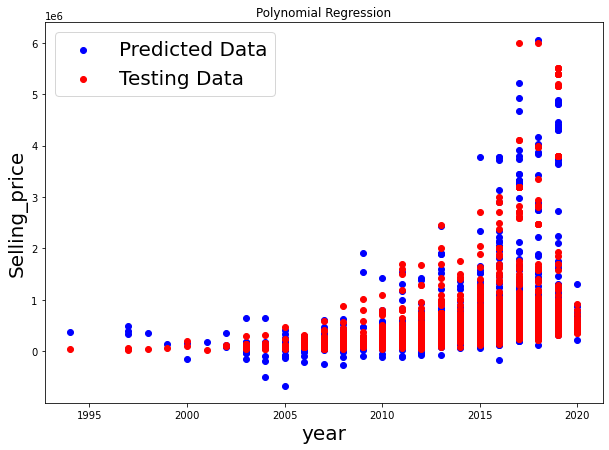

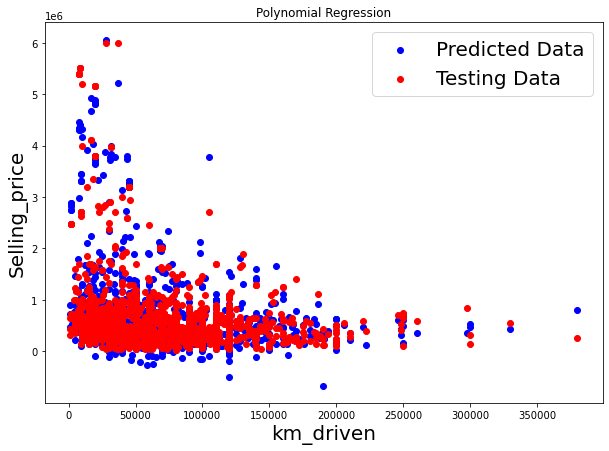

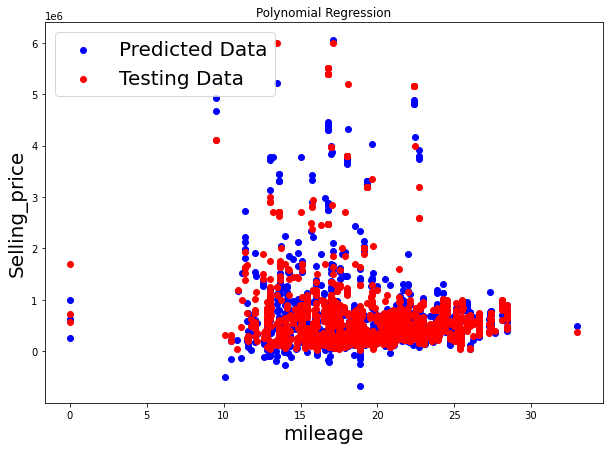

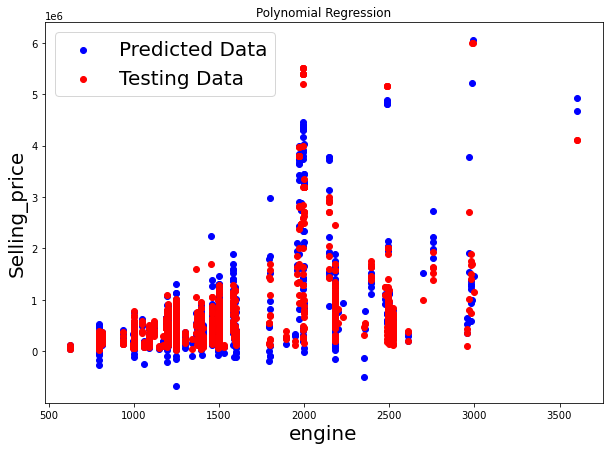

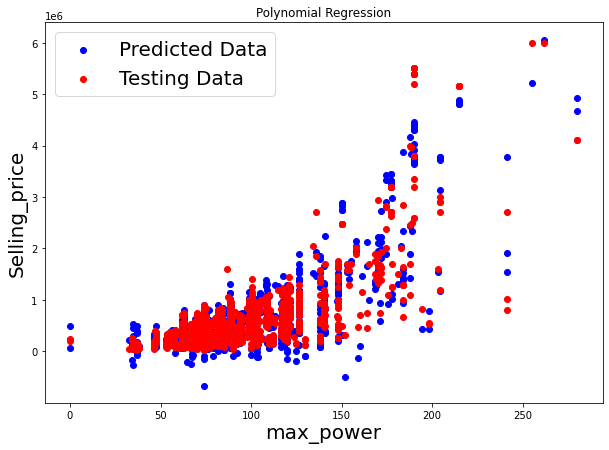

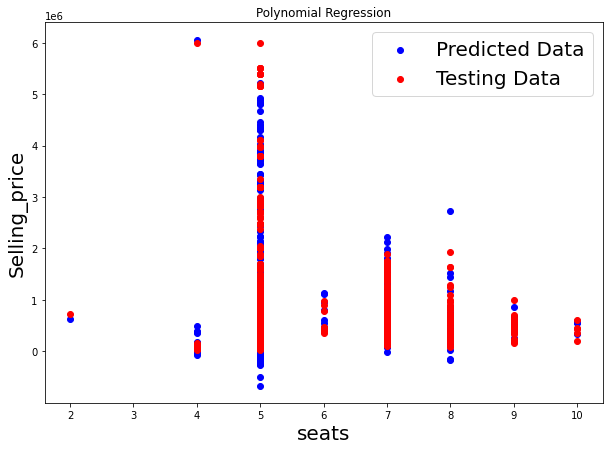

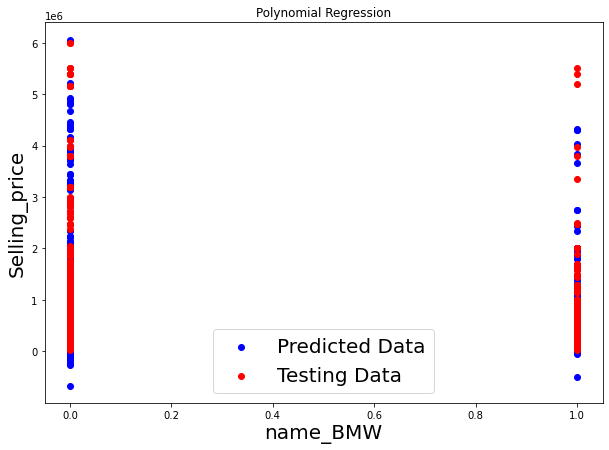

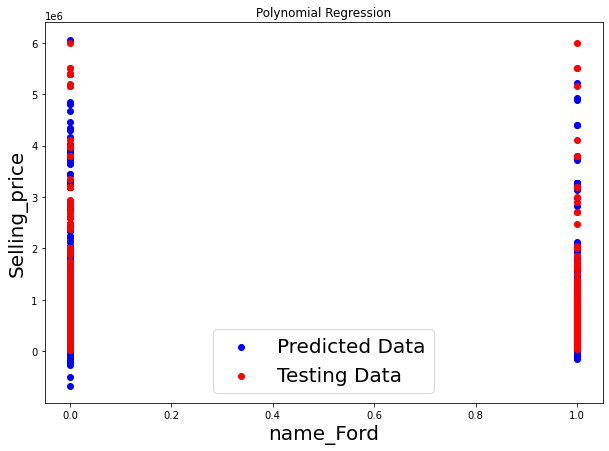

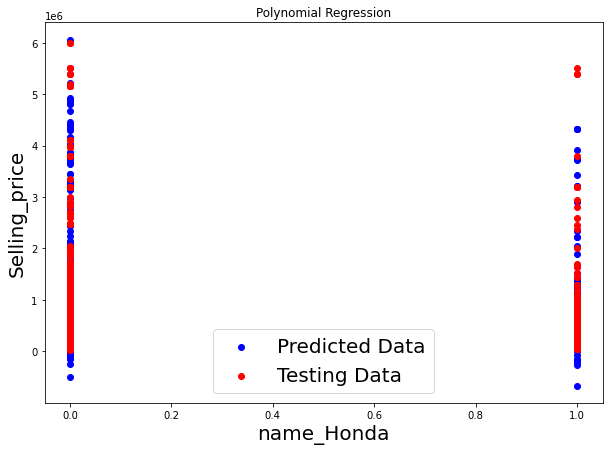

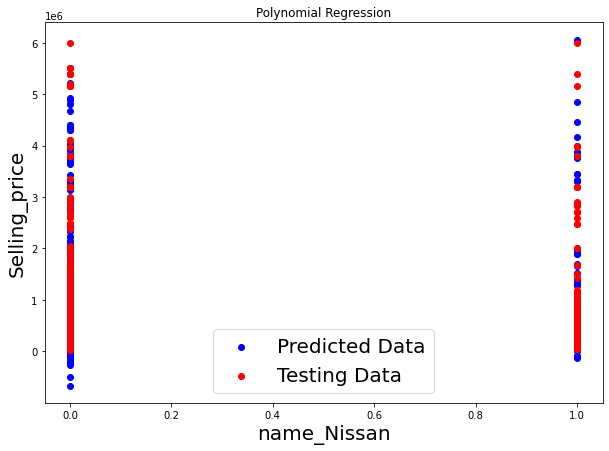

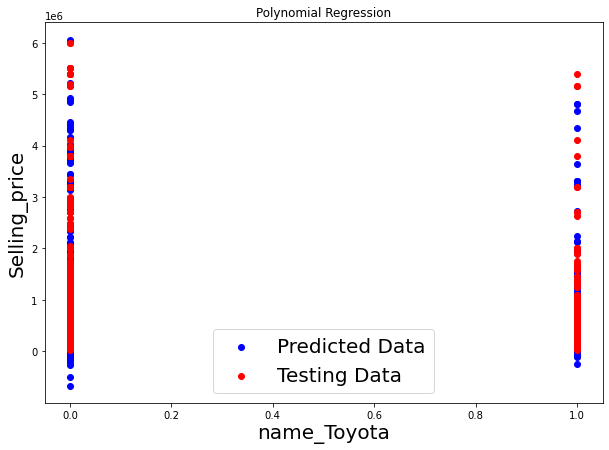

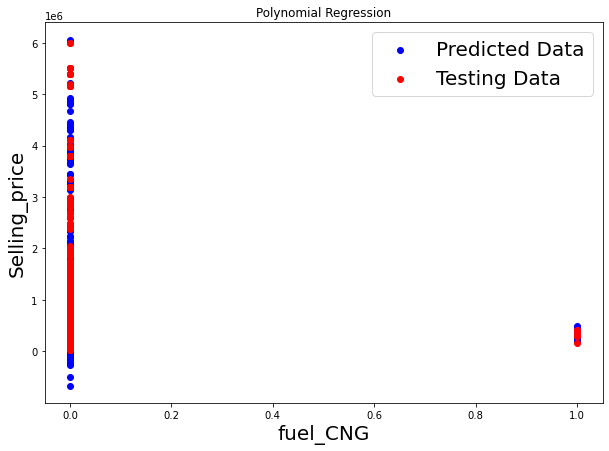

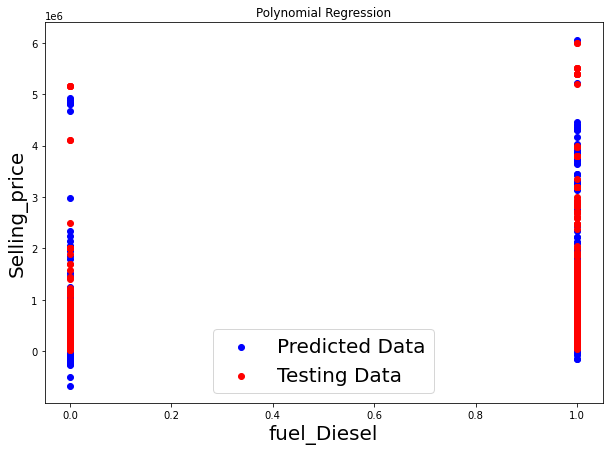

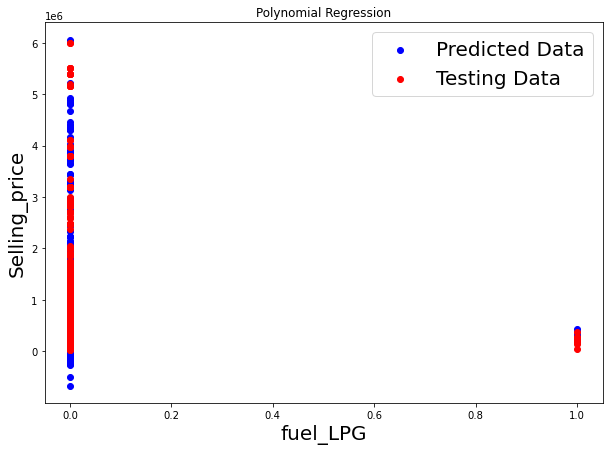

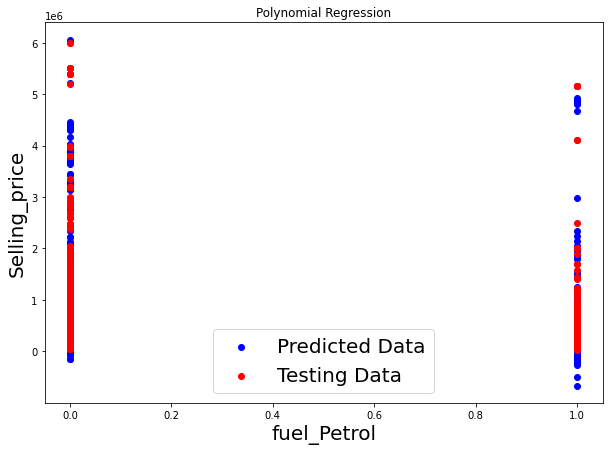

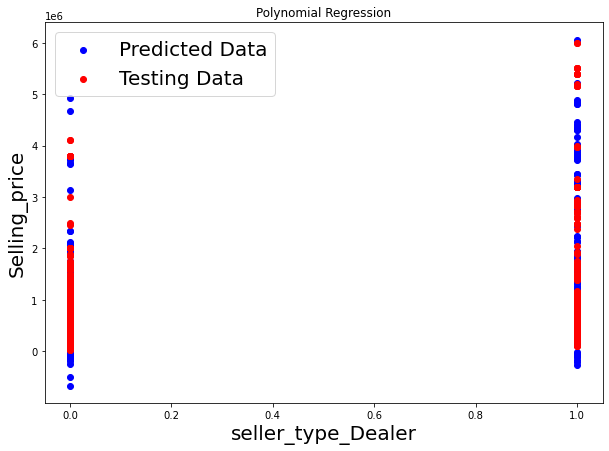

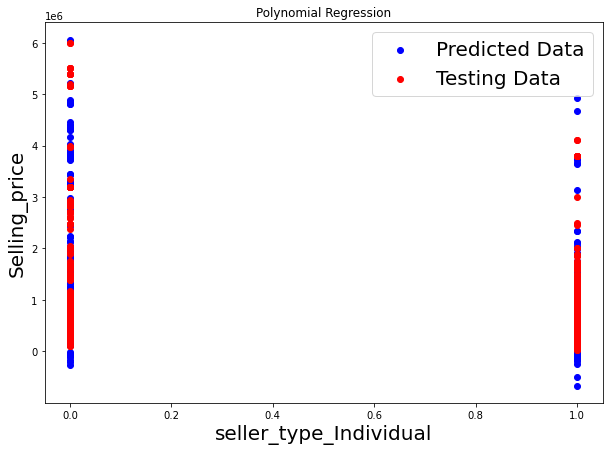

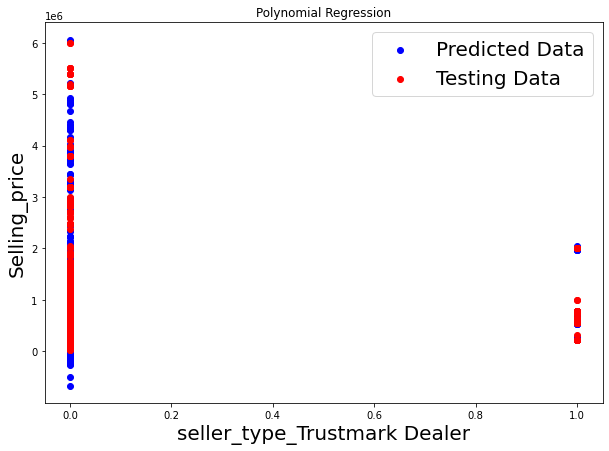

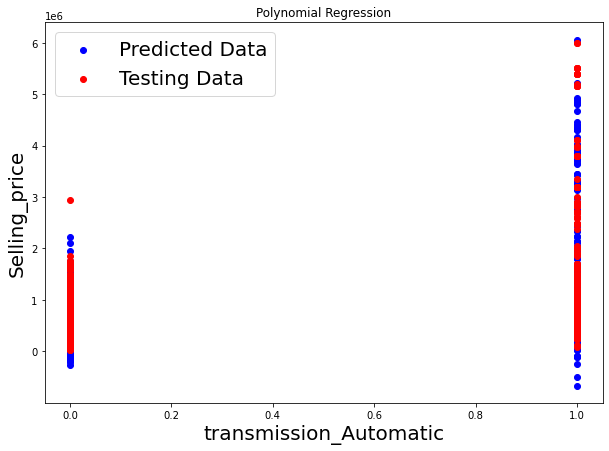

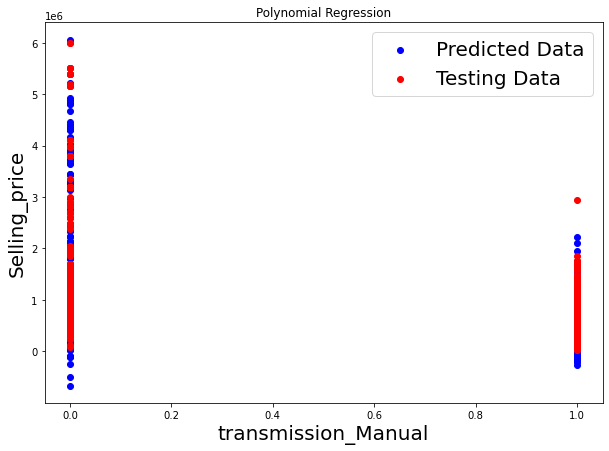

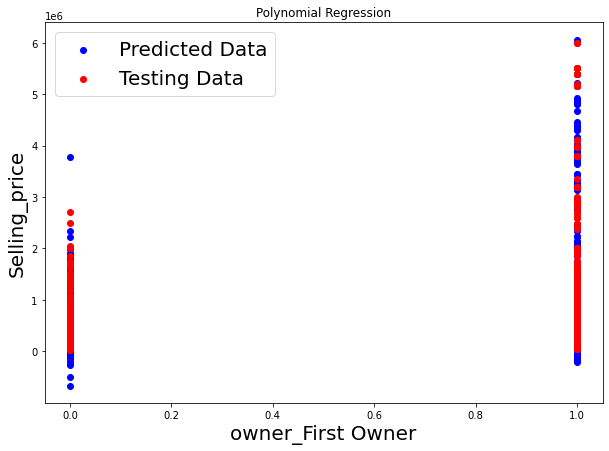

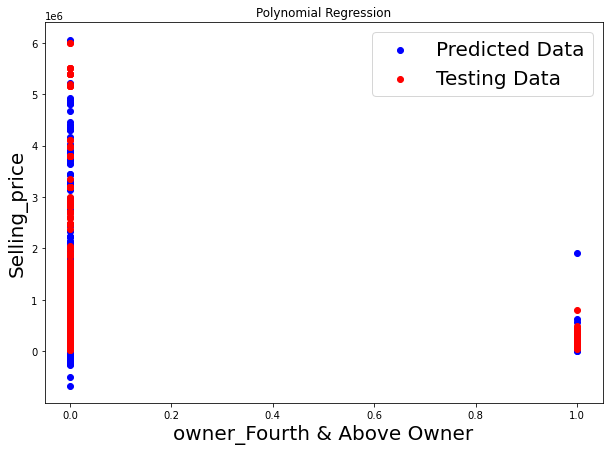

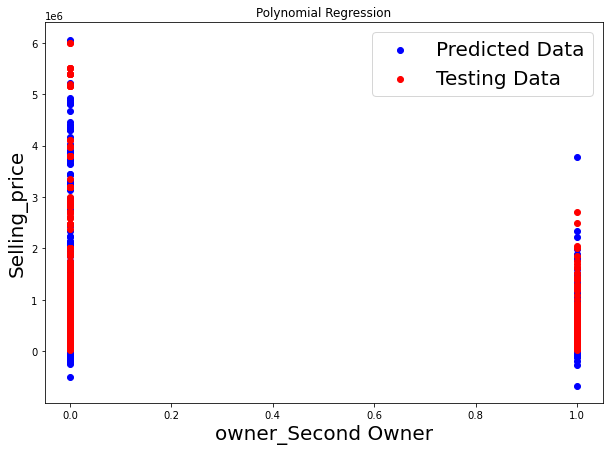

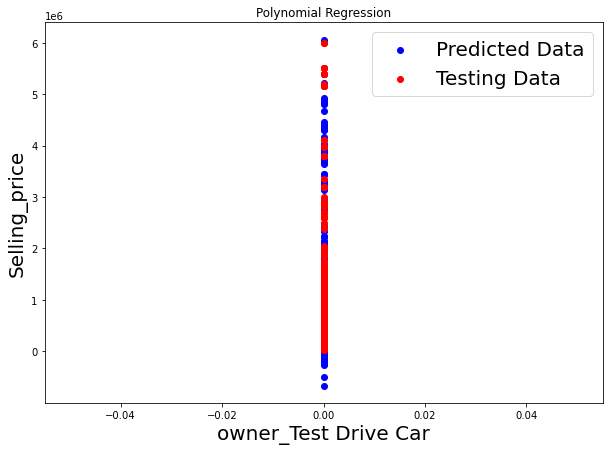

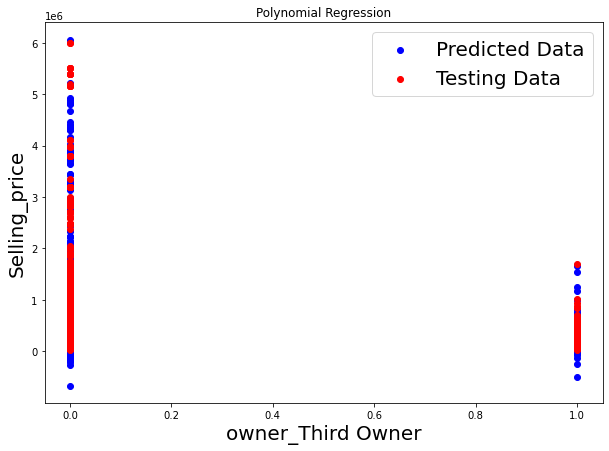

In [28]:
print(x_test[:,0].shape)
print(y_pred.shape)
name = np.array(list((pd.get_dummies(data=df)).columns))
start_value = 19
j = 0
for i in range(start_value,25):
      plt.figure(figsize=(10,7))
      plt.scatter(x_test[:,i], y_poly_pred, color='blue', label='Predicted Data')
      plt.scatter(x_test[:,i], y_test, color='red', label='Testing Data' )
      plt.legend (fontsize=20)
      plt.title('Polynomial Regression')
      plt.xlabel(name[j] , fontsize=20)
      plt.ylabel('Selling_price' , fontsize=20)
      plt.show()
      j +=1
j +=1
for i in range(19):
      plt.figure(figsize=(10,7))
      plt.scatter(x_test[:,i], y_poly_pred, color='blue', label='Predicted Data')
      plt.scatter(x_test[:,i], y_test, color='red', label='Testing Data' )
      plt.legend (fontsize=20)
      plt.title('Polynomial Regression')
      plt.xlabel(name[j] , fontsize=20)
      plt.ylabel('Selling_price' , fontsize=20)
      plt.show()
      j +=1